False    10000
Name: count, dtype: int64
CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService          True
Phone                   False
Multiple                False
OnlineSecurity          False

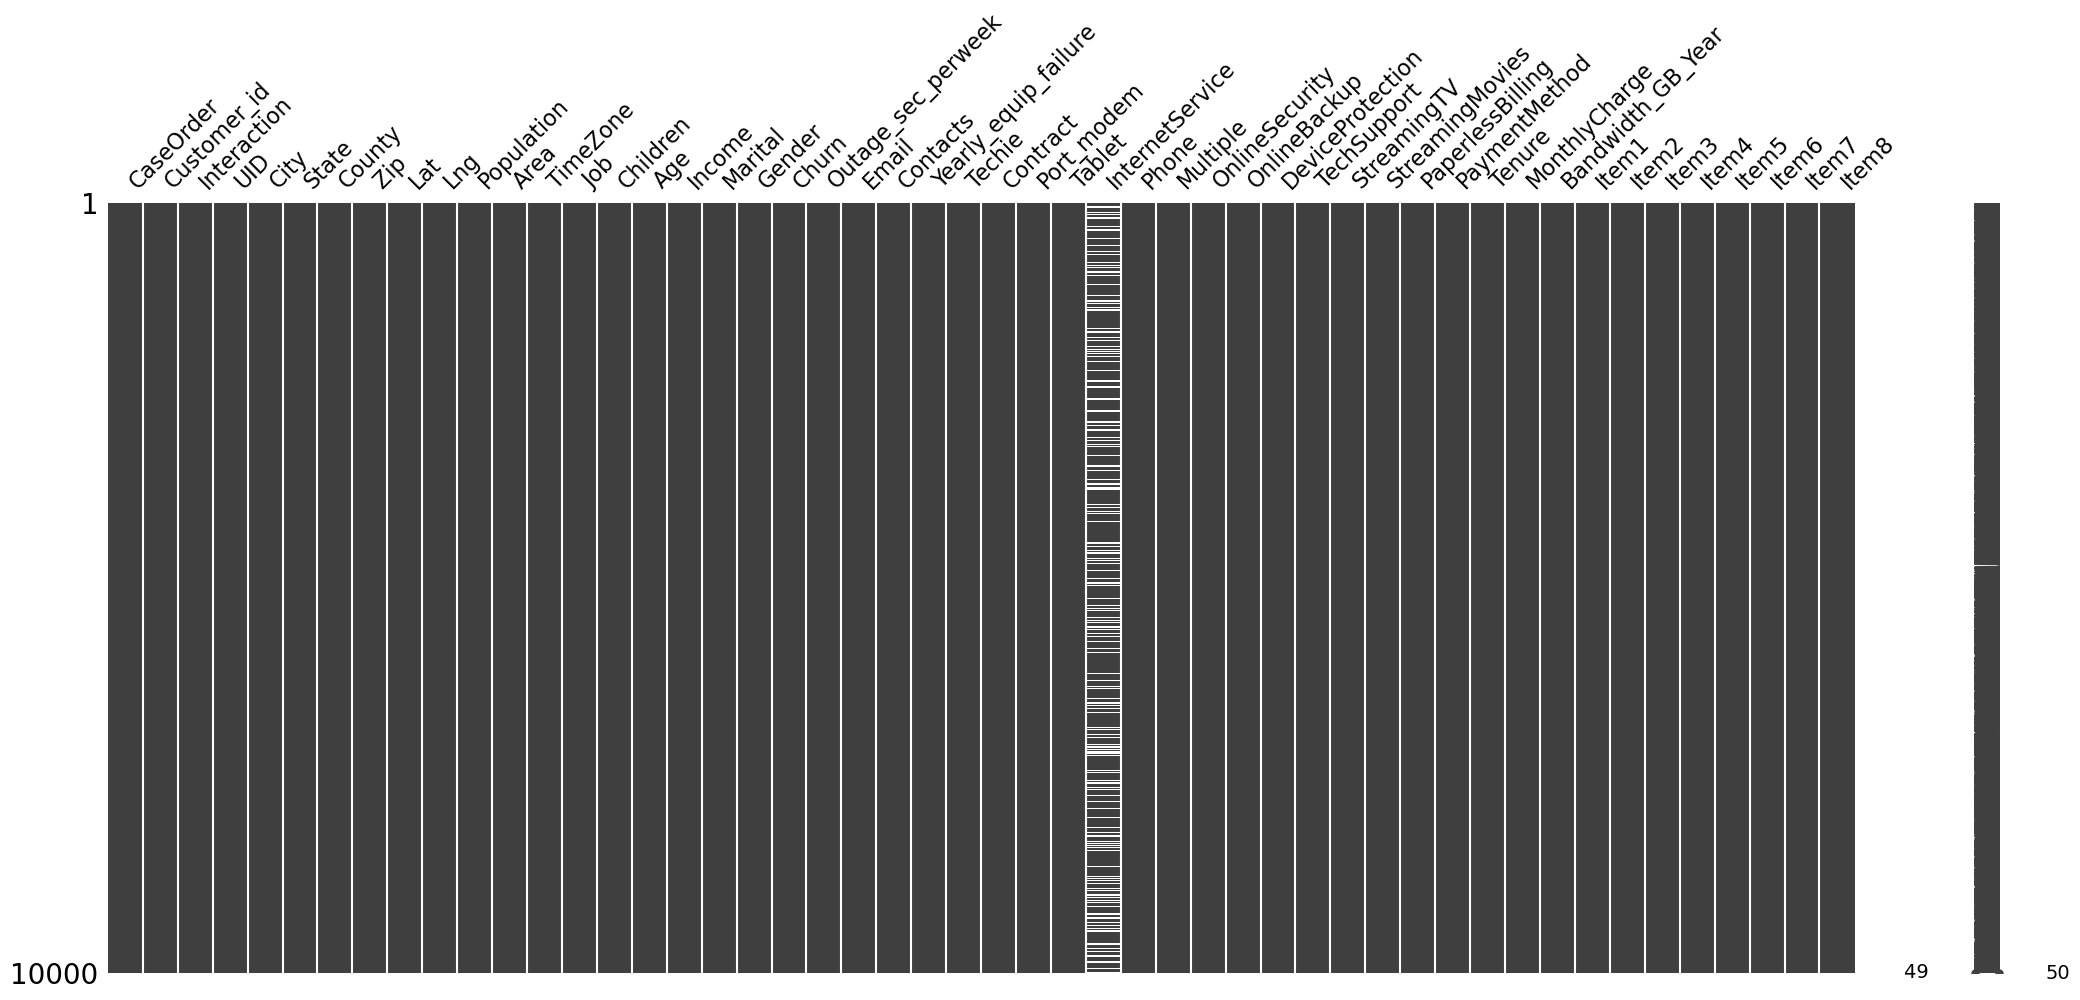



Percentage before imputation: InternetService
Fiber Optic    56.003049
DSL            43.996951
Name: count, dtype: float64
Count before imputation: InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64






Percentage after imputation: InternetService
Fiber Optic    56.08
DSL            43.92
Name: count, dtype: float64
Count after imputation: InternetService
Fiber Optic    5608
DSL            4392
Name: count, dtype: int64


InternetService
False    10000
Name: count, dtype: int64


++++=========Population========++++
Minimum value: 0
Maximum value: 111850
Value range: 111850
Mean Value: 9756.5624
Values with a z-score over 3: 219
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 937
Minimum Outlier Value: 31816
Maximum Outlier Value: 111850
Range of Outlier Values: 80034


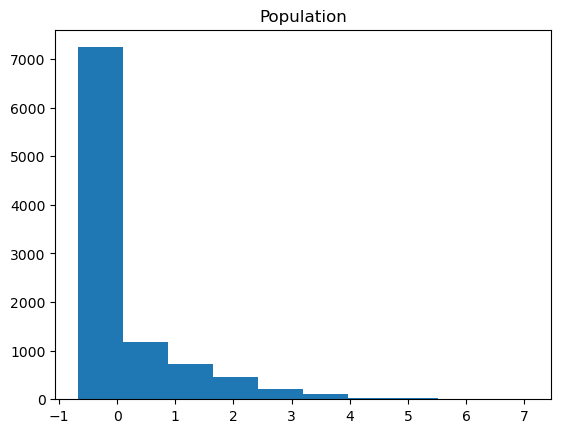

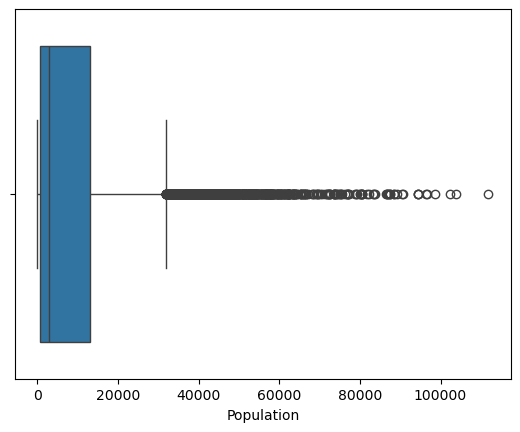

++++=========Children========++++
Minimum value: 0
Maximum value: 10
Value range: 10
Mean Value: 2.0877
Values with a z-score over 3: 191
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 401
Minimum Outlier Value: 8
Maximum Outlier Value: 10
Range of Outlier Values: 2


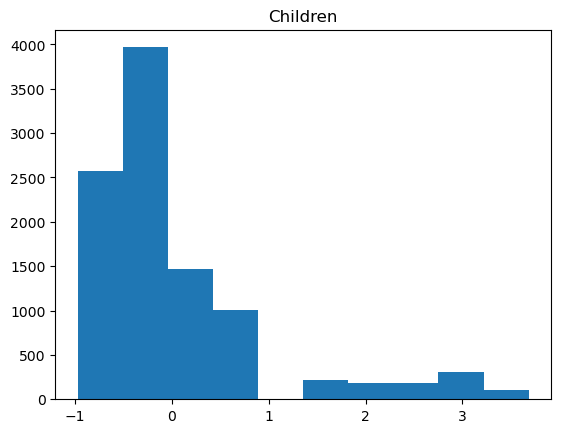

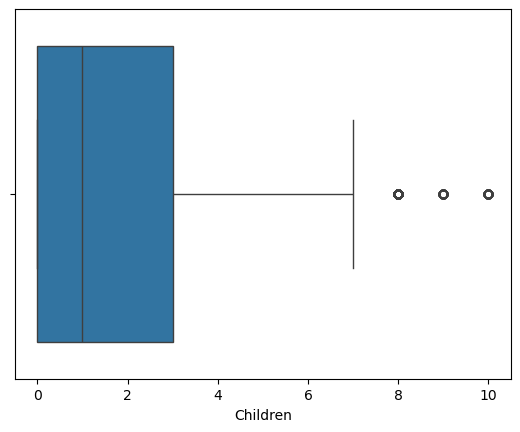

++++=========Age========++++
Minimum value: 18
Maximum value: 89
Value range: 71
Mean Value: 53.0784
Values with a z-score over 3: 0
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 0
Minimum Outlier Value: nan
Maximum Outlier Value: nan
Range of Outlier Values: nan


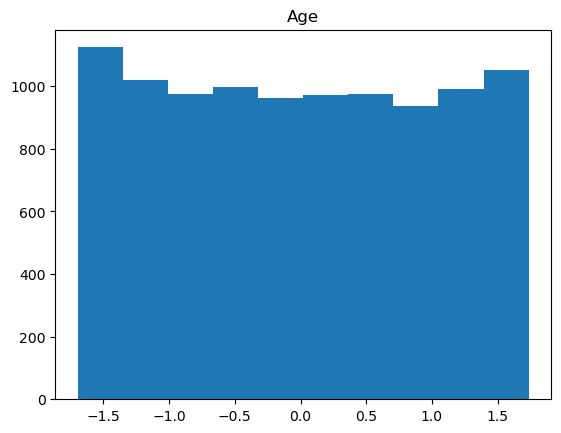

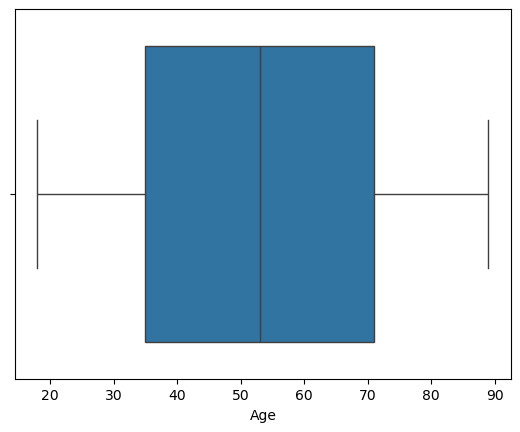

++++=========Income========++++
Minimum value: 348.67
Maximum value: 258900.7
Value range: 258552.03
Mean Value: 39806.926771
Values with a z-score over 3: 145
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 336
Minimum Outlier Value: 104362.5
Maximum Outlier Value: 258900.7
Range of Outlier Values: 154538.2


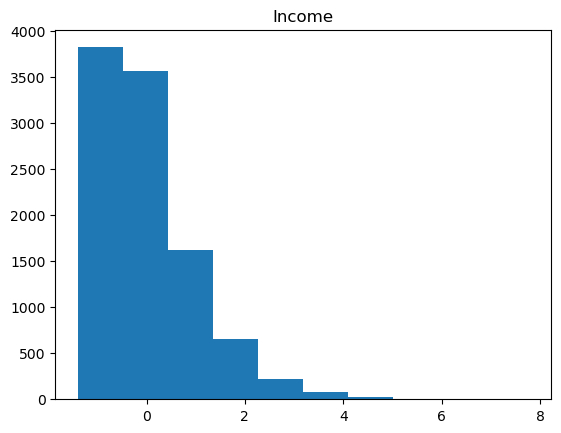

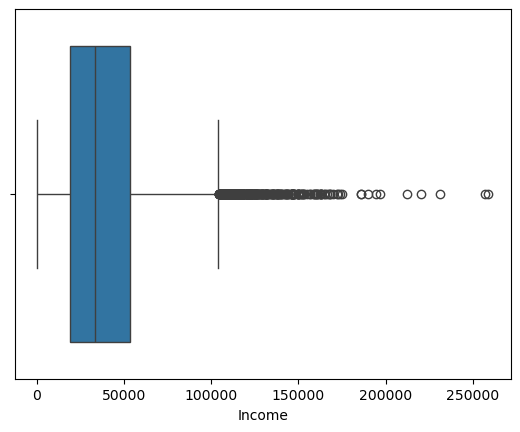

++++=========Email========++++
Minimum value: 1
Maximum value: 23
Value range: 22
Mean Value: 12.016
Values with a z-score over 3: 3
Values with a z-score under -3: 9
Values below IQR lower threshold: 23
Values above IQR upper threshold: 15
Minimum Outlier Value: 1
Maximum Outlier Value: 23
Range of Outlier Values: 22


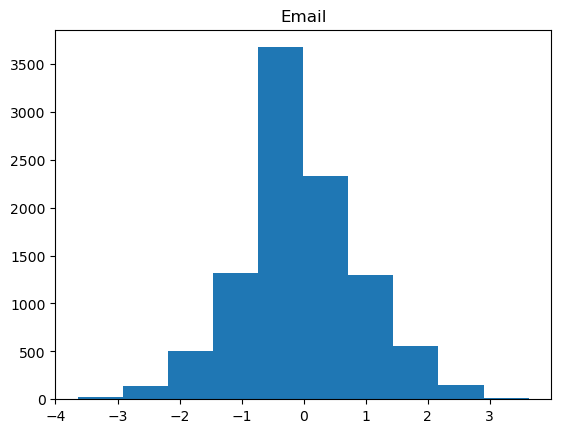

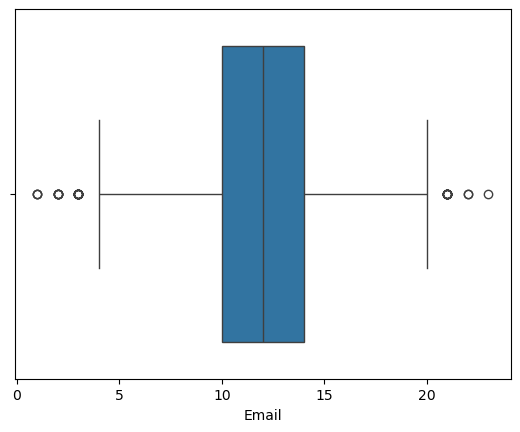

++++=========Contacts========++++
Minimum value: 0
Maximum value: 7
Value range: 7
Mean Value: 0.9942
Values with a z-score over 3: 165
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 8
Minimum Outlier Value: 6
Maximum Outlier Value: 7
Range of Outlier Values: 1


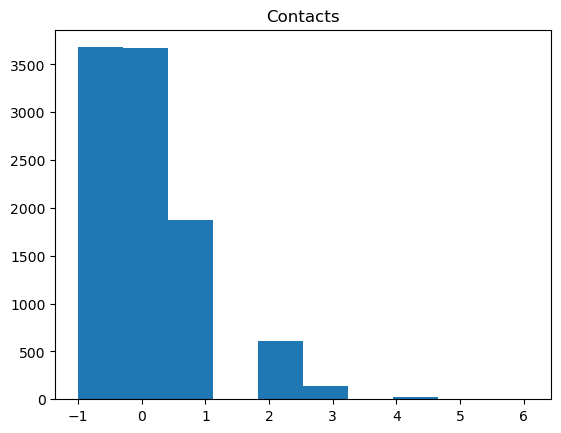

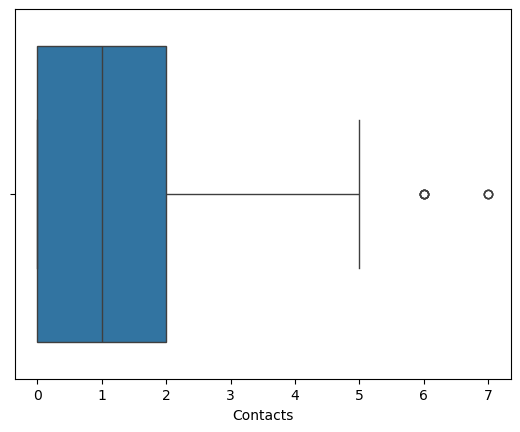

++++=========Yearly_equip_failure========++++
Minimum value: 0
Maximum value: 6
Value range: 6
Mean Value: 0.398
Values with a z-score over 3: 94
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 94
Minimum Outlier Value: 3
Maximum Outlier Value: 6
Range of Outlier Values: 3


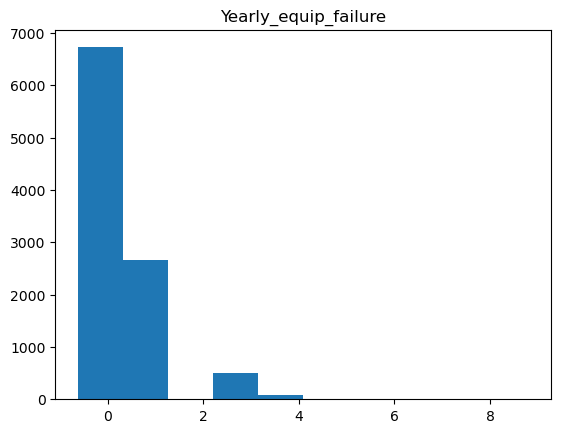

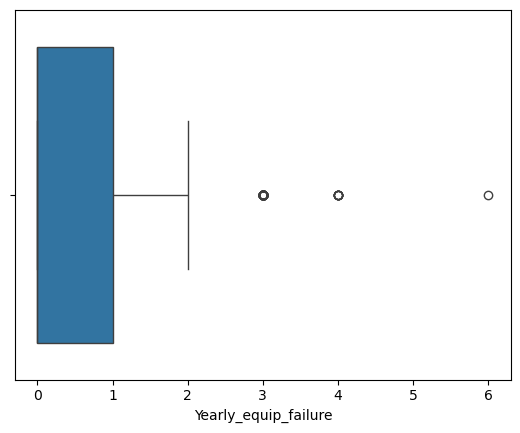

++++=========Tenure========++++
Minimum value: 1.00025934
Maximum value: 71.99928
Value range: 70.99902066
Mean Value: 34.5261880889938
Values with a z-score over 3: 0
Values with a z-score under -3: 0
Values below IQR lower threshold: 0
Values above IQR upper threshold: 0
Minimum Outlier Value: nan
Maximum Outlier Value: nan
Range of Outlier Values: nan


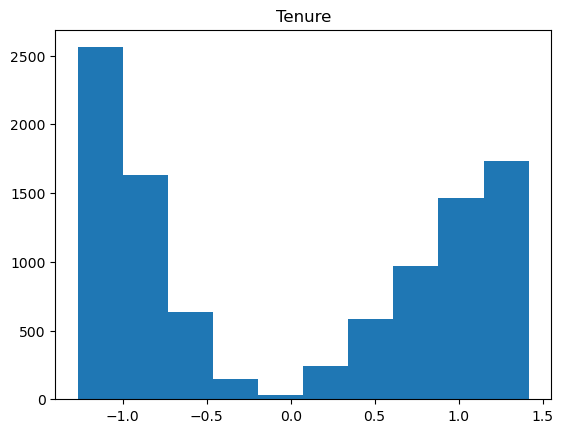

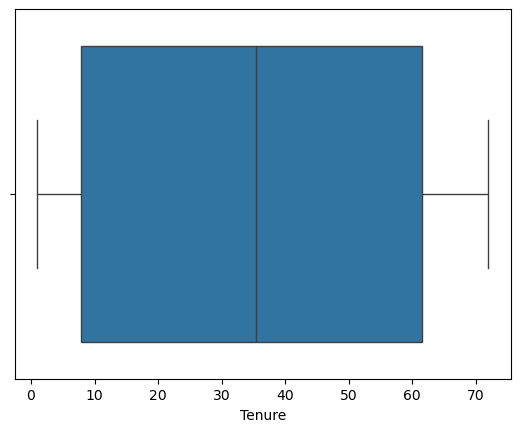

In [1]:
#Clean the data

#Import the packages I'll be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import missingno as msno

#Read in the data
df = pd.read_csv("churn_clean.csv")

#Check for duplicates - None Found
print(df.duplicated().value_counts())

#Check for missing values - Missing values found in internet service
print(df.isna().any())

#Verify scope of missing values
print(df['InternetService'].isna().value_counts)

#Print missing number matrix
msno.matrix(df)
plt.show()

#Copy value_counts for calculations
counts = df['InternetService'].value_counts()

#Print percentage and count before imputation
print('\n')
print(f'Percentage before imputation: {counts / counts.sum() * 100}')
print(f'Count before imputation: {counts}')
print('\n')


#2,129 missing values found in InternetService
#The data is below the threshold for removal
#As the data is categorical, mitigation will be imputing with the mode
df['InternetService'] = df['InternetService'].ffill()
print('\n')

#Copy value_counts for calculations
counts = df['InternetService'].value_counts()
print('\n')

#Print percentage and count after imputation
print(f'Percentage after imputation: {counts / counts.sum() * 100}')
print(f'Count after imputation: {counts}')
print('\n')

#Verify mitigation method
print(df['InternetService'].isna().value_counts())
print('\n')


#Collect numeric variables for outlier analysis
numeric_columns = ['Population', 'Children', 'Age', 'Income', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure']

#Loop through the numeric variables and generate a report for each
for column in numeric_columns:
    #Generate name for new column based on original column name
    name = 'Z_Score_' + column
    #Calculate z-score and assign its value to fields in new column
    df[name] = stats.zscore(df[column])
    #Print relevant information about values in the set
    print(f'++++========={column}========++++')
    print(f'Minimum value: {df[column].min()}')
    print(f'Maximum value: {df[column].max()}')
    print(f'Value range: {df[column].max() - df[column].min()}')
    print(f'Mean Value: {df[column].mean()}')
    print(f'Values with a z-score over 3: {sum(stats.zscore(df[column]) > 3)}')
    print(f'Values with a z-score under -3: {sum(stats.zscore(df[column]) < -3)}')
    #Calculate quartiles
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    lower_threshold = q1 - 1.5 * stats.iqr(df[column])
    upper_threshold = q3 + 1.5 * stats.iqr(df[column])
    print(f'Values below IQR lower threshold: {(df[column] < lower_threshold).sum()}')
    print(f'Values above IQR upper threshold: {(df[column] > upper_threshold).sum()}')
    outliers = df.query(column + ' < ' + str(lower_threshold) + ' | ' + column + ' > ' + str(upper_threshold))
    print(f'Minimum Outlier Value: {outliers[column].min()}')
    print(f'Maximum Outlier Value: {outliers[column].max()}')
    print(f'Range of Outlier Values: {outliers[column].max() - outliers[column].min()}')
    #Plot the histogram
    plt.hist(df[name])
    plt.title(column)
    plt.show()
    #Plot the boxplots
    boxplot=sns.boxplot(x=column, data=df)
    plt.show()

df.to_csv('churn_clean_2.csv');

In [3]:
#Variable Reports

#Import the packages I'll be using
import pandas as pd

df = pd.read_csv('churn_clean_2.csv')

associated_variables = ['Bandwidth_GB_Year', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Email', 'Contacts',
                       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
                       'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure']

#Print reports for associated variables
for variable in associated_variables:
    print(f'========Begin Report========')
    print(f'========{variable}========')
    print(df[variable].describe())
    if pd.api.types.is_numeric_dtype(df[variable]):
        print(f'Median: {df[variable].median()}')
    else:
        print(f'Unique Values: {df[variable].unique()}')
        print(f'Unique Value Counts: {df[variable].value_counts()}')
    print(f'========End Report========')

========Begin Report========
========Bandwidth_GB_Year========
count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64
Median: 3279.536903
========End Report========
========Begin Report========
========Population========
count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64
Median: 2910.5
========End Report========
========Begin Report========
========Area========
count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object
Unique Values: ['Urban' 'Suburban' 'Rural']
Unique Value Counts: Area
Suburban    3346
Urban       3327
Rural       3327
Name: count, dtype: int64
========End Report========
========Begin Report========
====

========Bandwidth_GB_Year========


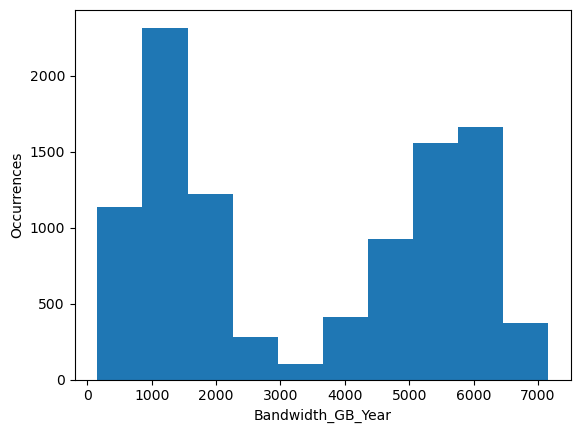

========Population========


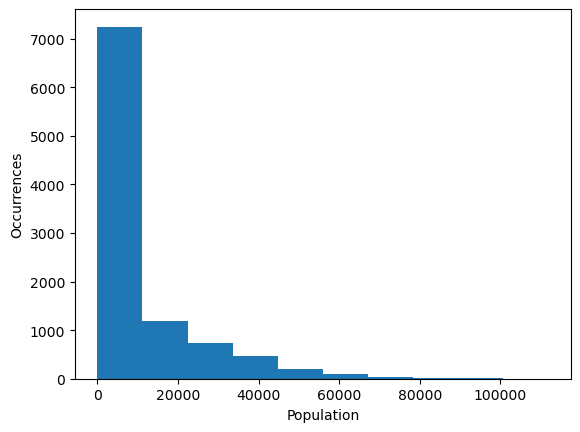

========Area========


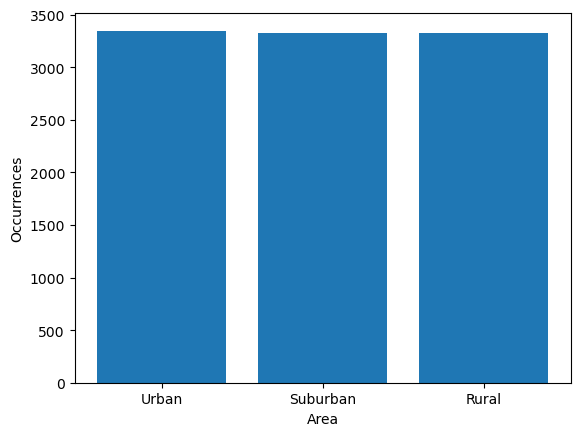

========Children========


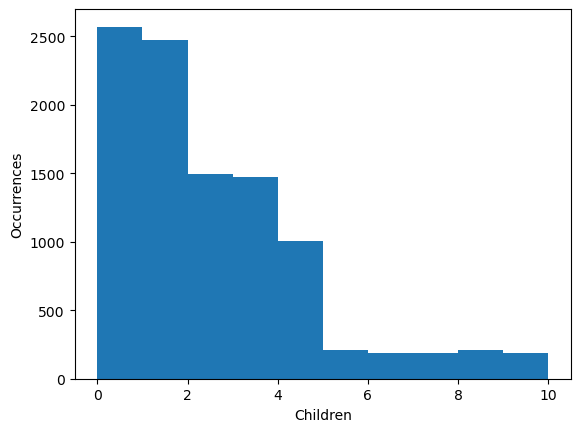

========Age========


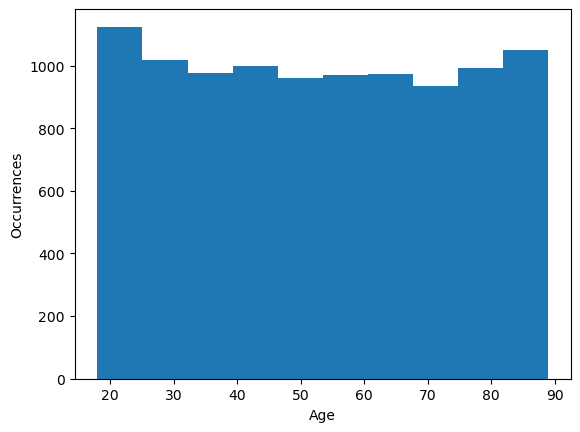

========Income========


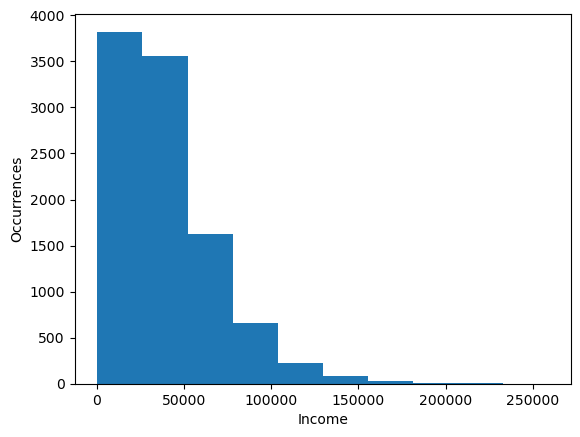

========Marital========


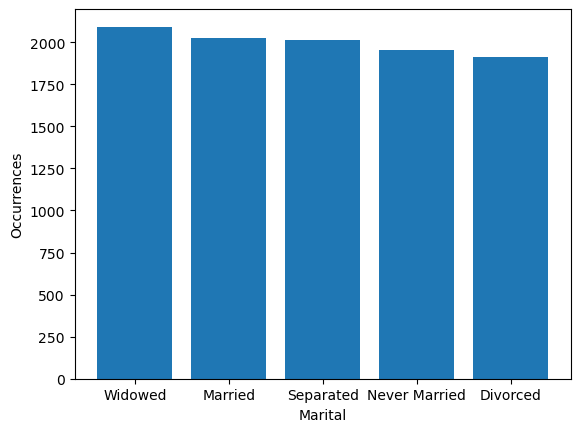

========Gender========


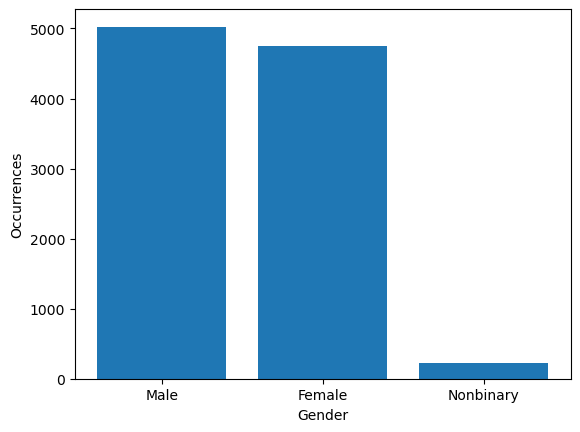

========Email========


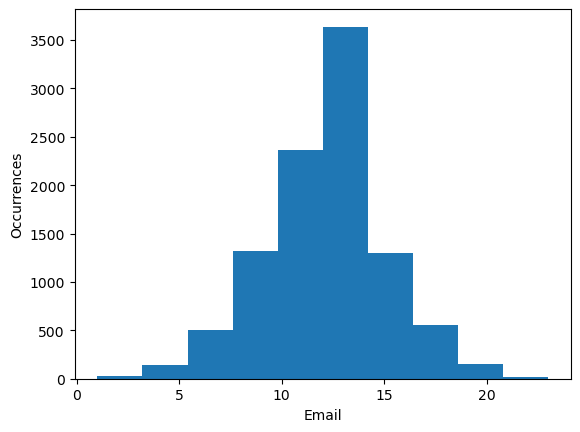

========Contacts========


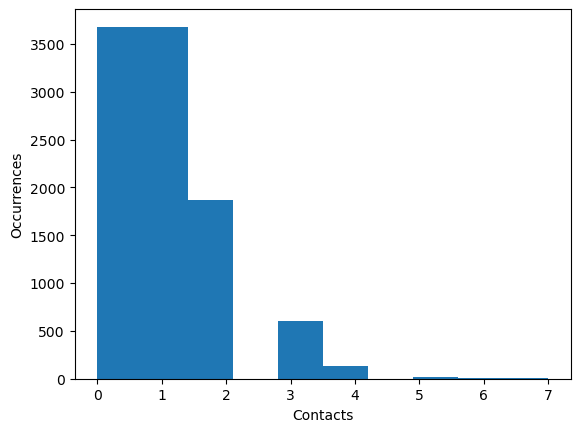

========Yearly_equip_failure========


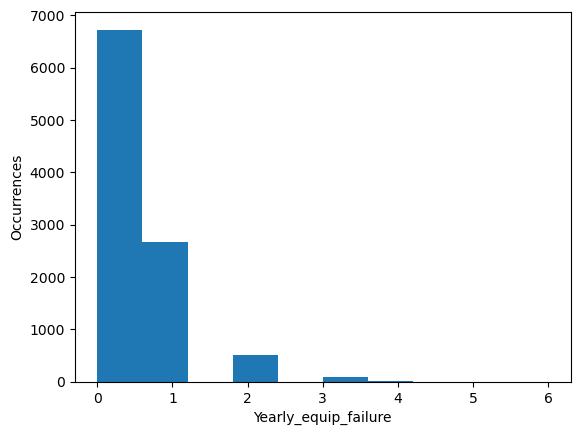

========Techie========


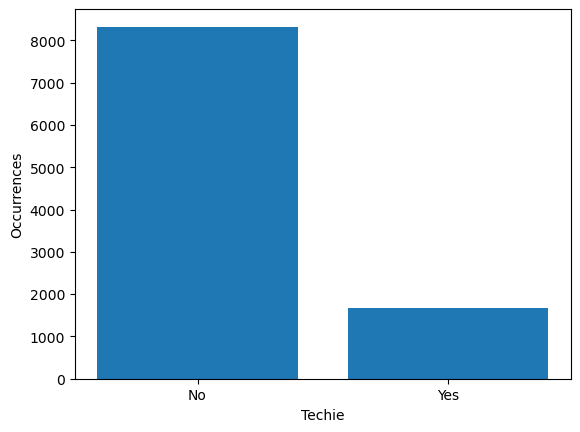

========Contract========


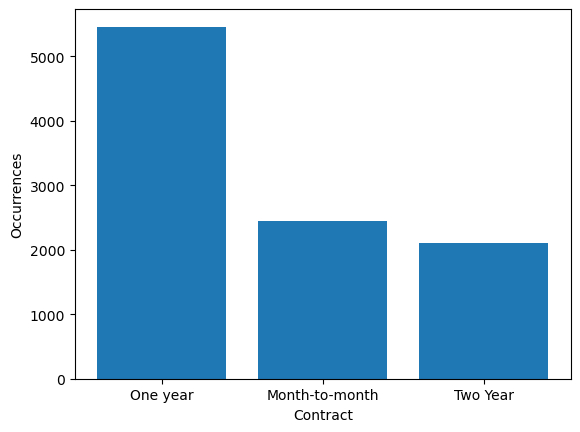

========Port_modem========


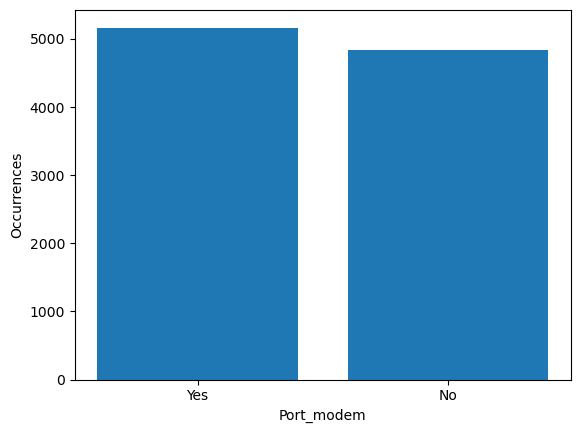

========Tablet========


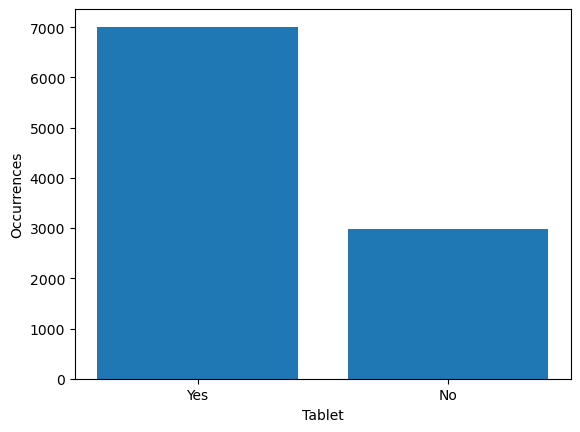

========InternetService========


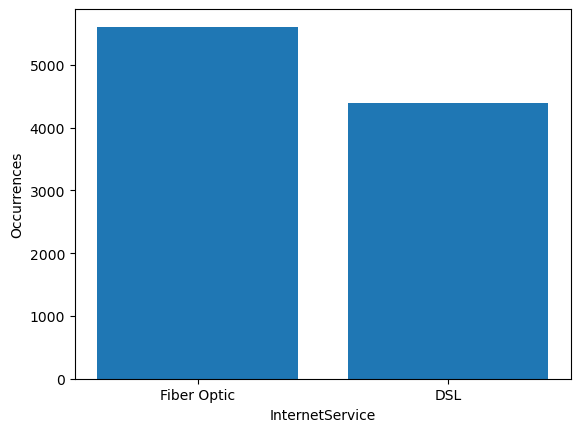

========Phone========


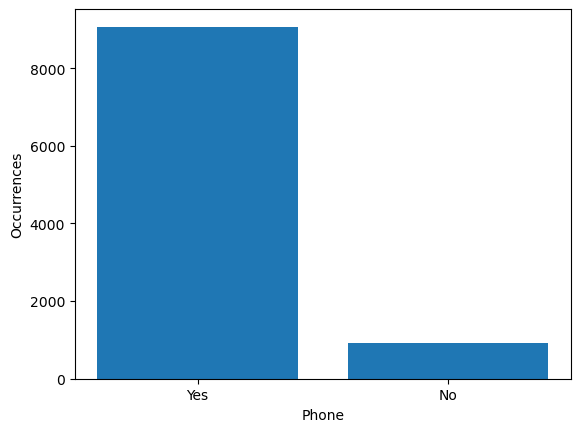

========Multiple========


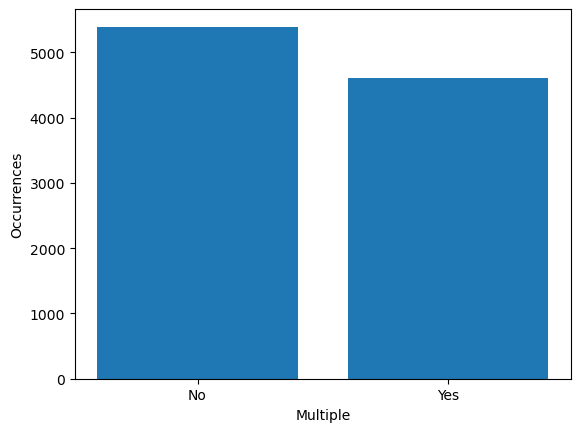

========OnlineSecurity========


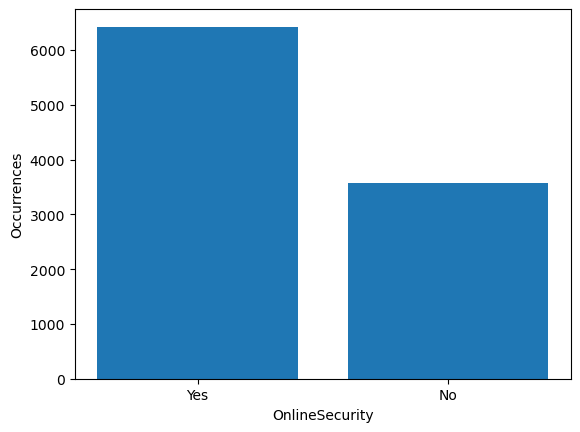

========OnlineBackup========


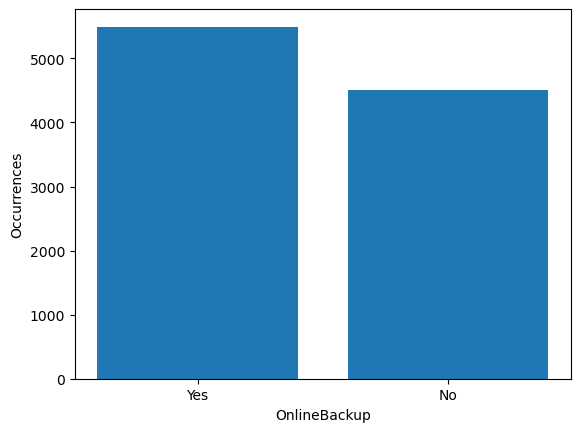

========StreamingTV========


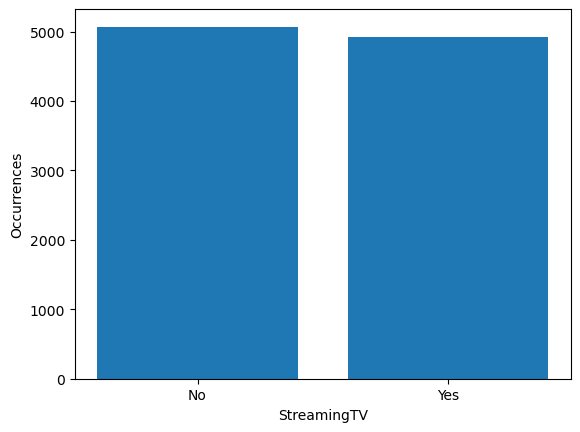

========StreamingMovies========


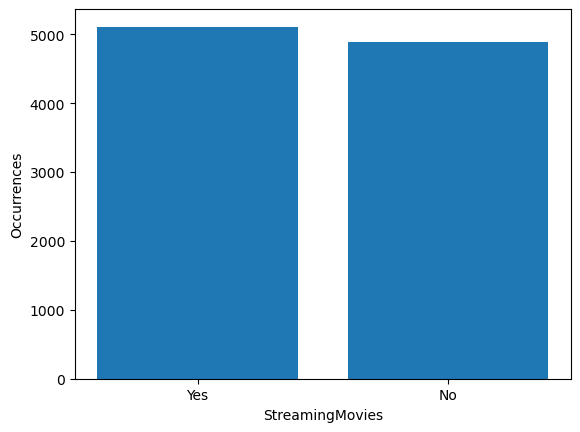

========Tenure========


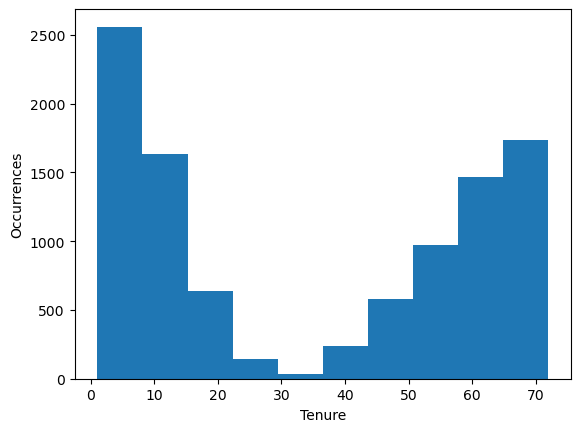

In [5]:
#Univariate Analysis

#Import the packages I'll be using
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('churn_clean_2.csv')

associated_variables = ['Bandwidth_GB_Year', 'Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Email', 'Contacts',
                       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
                       'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure']

#Print graphs for associated variables
for variable in associated_variables:
    print(f'========{variable}========')
    if pd.api.types.is_numeric_dtype(df[variable]):
        plt.hist(df[variable])
        plt.xlabel(variable)
        plt.ylabel('Occurrences')
        plt.show()
    else:
        plt.bar(df[variable].unique(), df[variable].value_counts(), label=df[variable].unique())
        plt.xlabel(variable)
        plt.ylabel('Occurrences')
        plt.show()

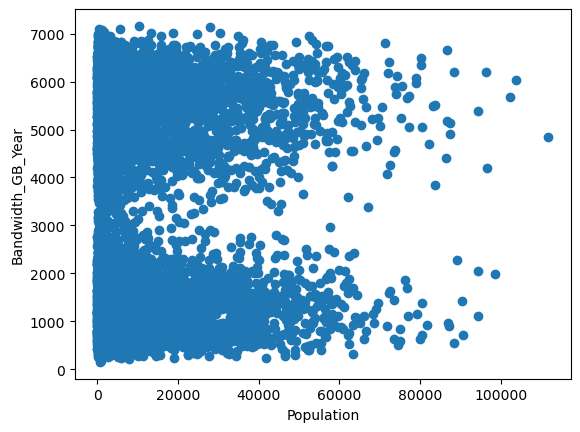

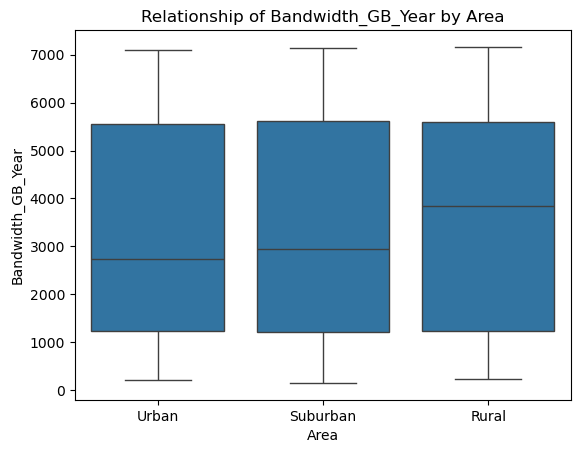

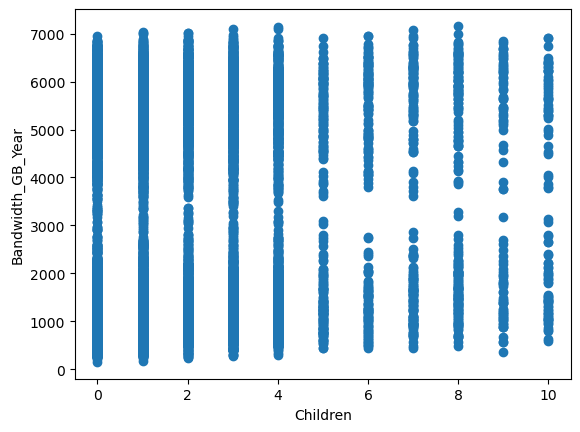

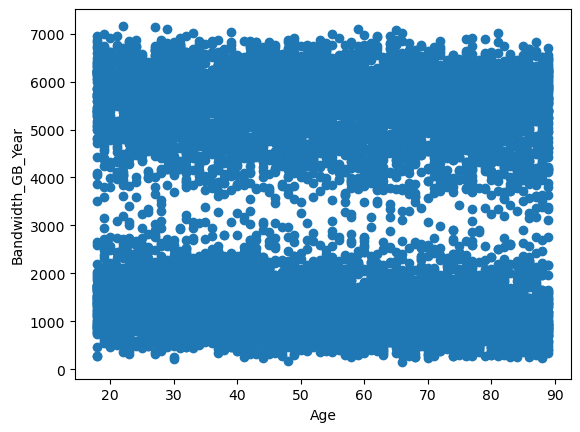

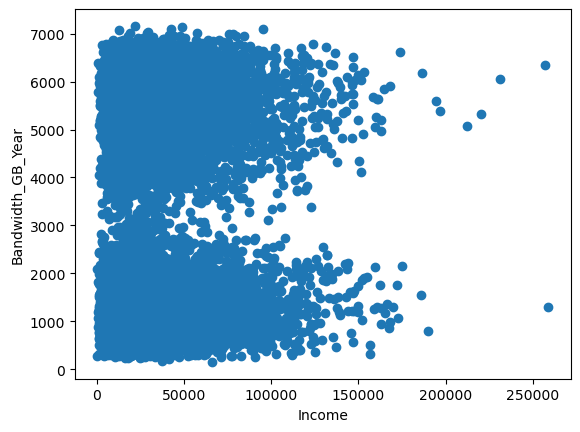

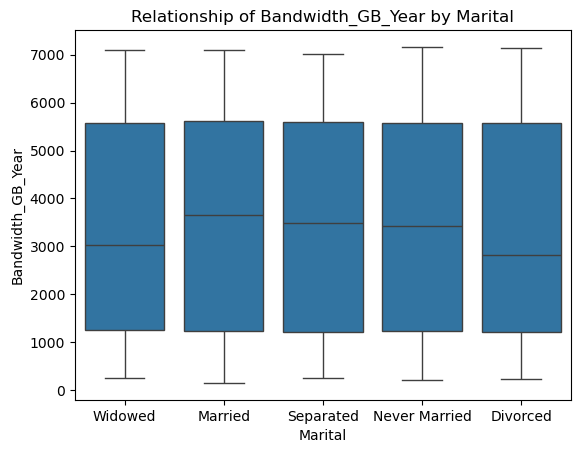

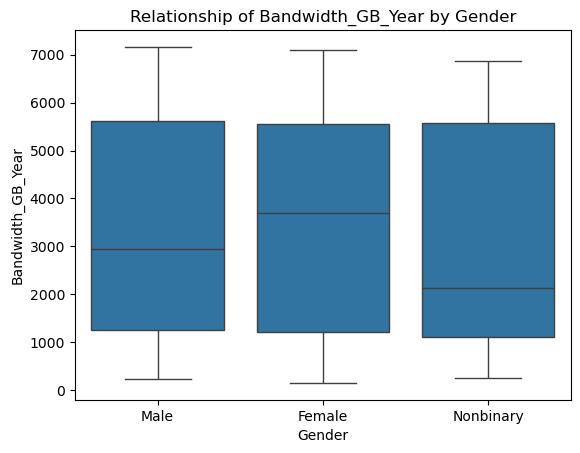

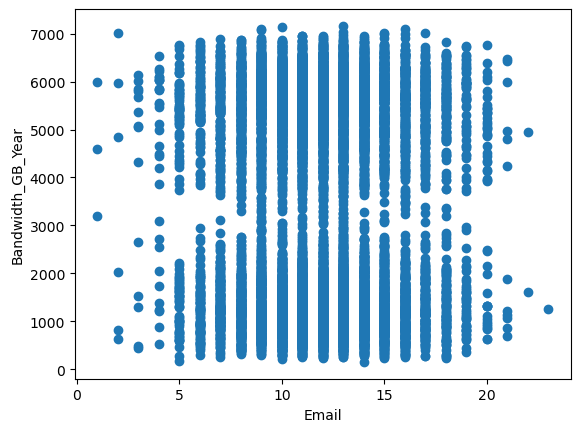

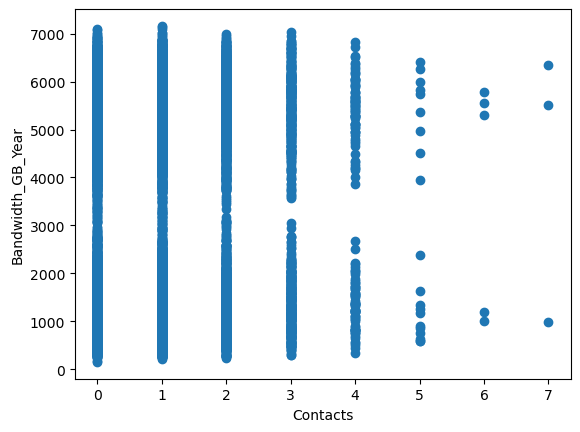

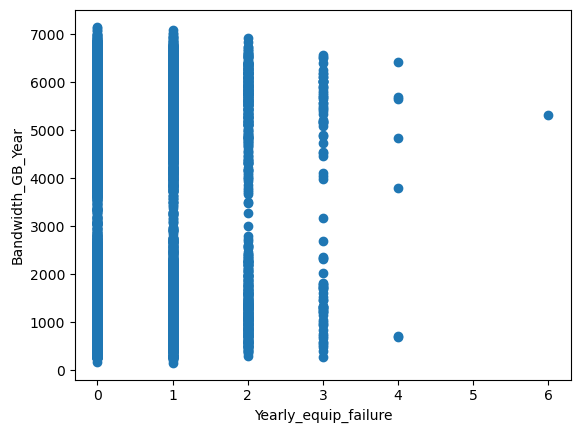

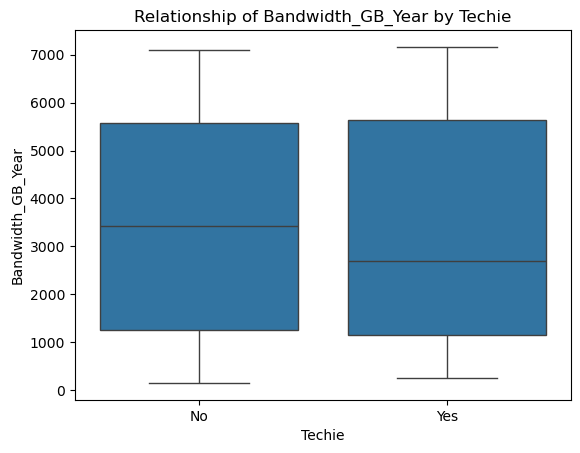

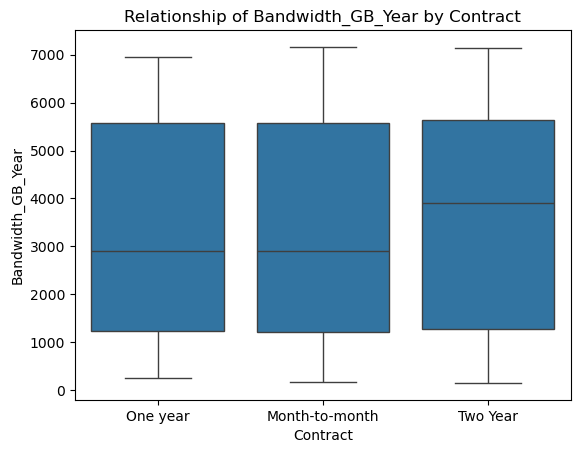

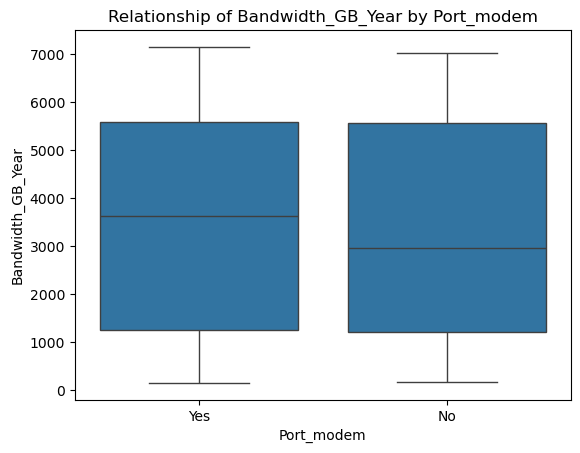

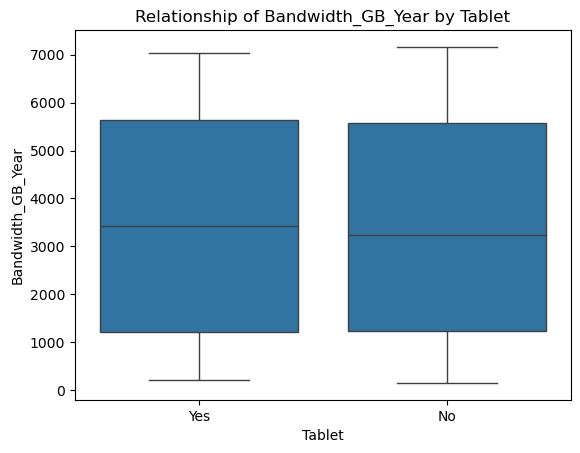

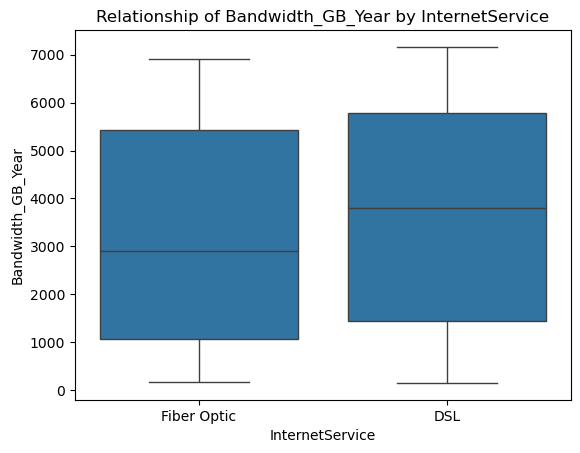

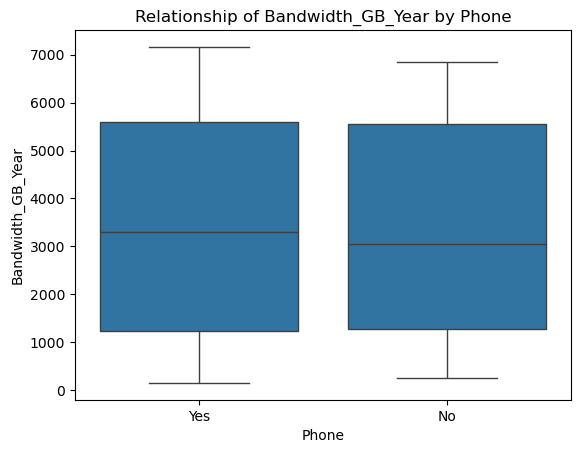

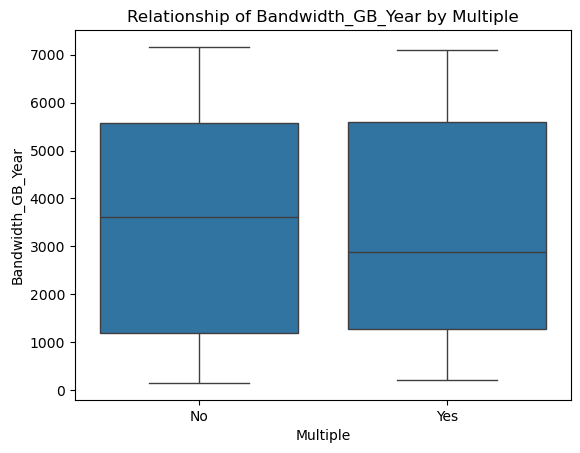

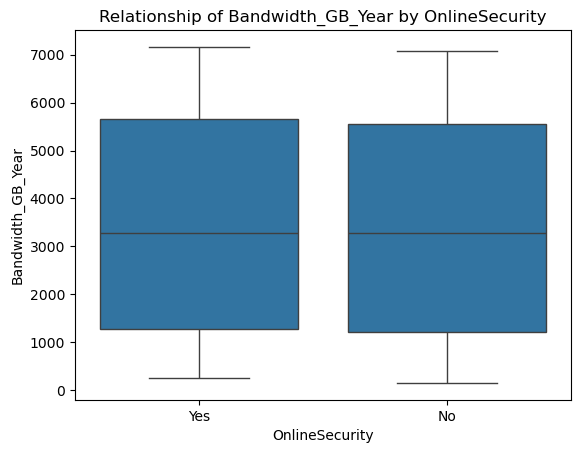

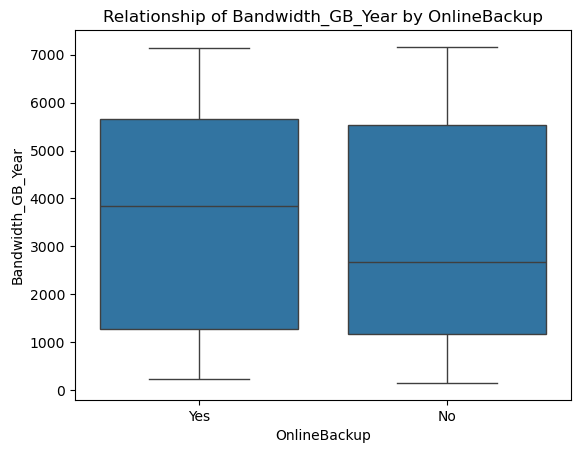

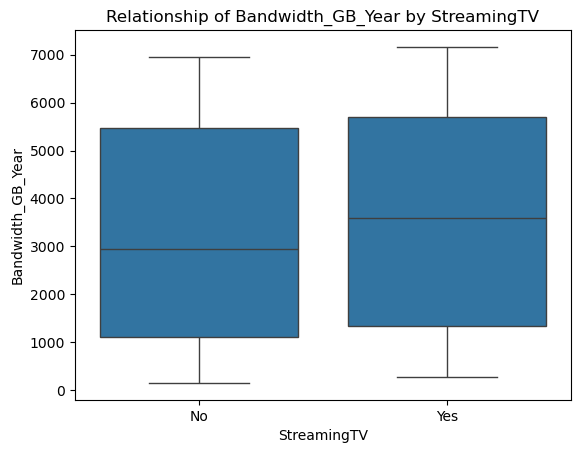

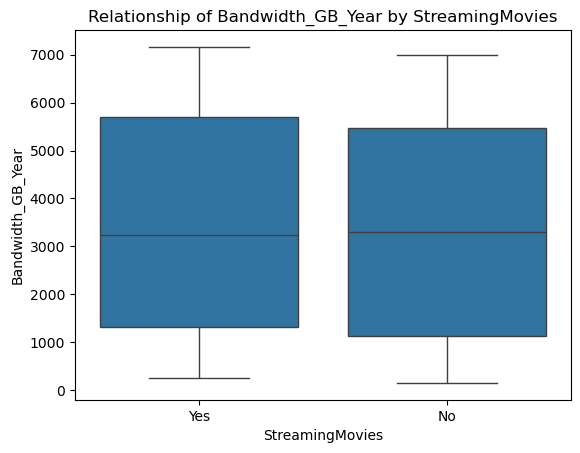

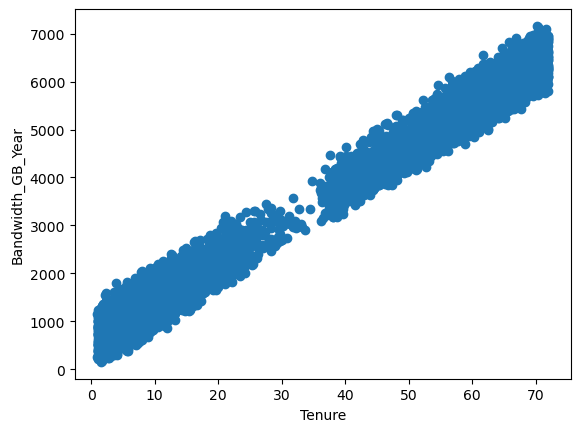

In [7]:
#Bivariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('churn_clean_2.csv')

independent_variables = ['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Email', 'Contacts',
                       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
                       'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure']

for variable in independent_variables:
    if pd.api.types.is_numeric_dtype(df[variable]):
        plt.scatter(df[variable], df['Bandwidth_GB_Year'])
        plt.xlabel(variable)
        plt.ylabel('Bandwidth_GB_Year')
        plt.show()
    else:
        sns.boxplot(data=df, x=variable, y='Bandwidth_GB_Year')
        plt.title(f'Relationship of Bandwidth_GB_Year by {variable}')
        plt.xlabel(variable)
        plt.ylabel('Bandwidth_GB_Year')
        plt.show()

In [9]:
#Re-Expression of Categorical Variables
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('churn_clean_2.csv')

categorical_variables = ['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 
                         'Multiple', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']

#Separate reports
print('##### Before Encoding ####')

#Examine values present in categorical_variables to determine treatment
for variable in categorical_variables:
    print(f'{variable} : {df[variable].unique()}')

#Variables I'll apply one-hot encoding to
one_hot_columns = ['Area', 'Marital', 'Gender', 'InternetService']

#Variables I'll apply ordinal encoding to
ordinal_columns = ['Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']

#Separate reports
print('##### After Encoding ####')

#I went back and forth with Contract, but determinied it was ordinal given that one year is a longer term than month-to-month
#And two years is a longer term than one year
df['Contract'] = df['Contract'].map({'Month-to-month' : 0, 'One year' : 1, 'Two Year' : 2})
print(f'Contract : {df['Contract'].unique()}')

for column in ordinal_columns:
    df[column] = df[column].map({'No' : 0, 'Yes' : 1})
    print(f'{column} : {df[column].unique()}')

#Perform One-Hot Encoding using Scikit-learn's OneHotEncoder
#https://www.geeksforgeeks.org/ml-one-hot-encoding/
#Initialize new encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
#Encode values
one_hot_encoded = encoder.fit_transform(df[one_hot_columns])
#Create a new data frame from encoded values
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(one_hot_columns))
#Verify new data frame
print('#### One-Hot Encoded Data Frame ####')
print(one_hot_df)
#Concatenate the original data frame with the one-hot encoded data frame
df = pd.concat([df, one_hot_df], axis=1)
#Drop the original columns
df = df.drop(one_hot_columns, axis=1)

#Define the final data frame
df_final_columns = ['Population', 'Area_Suburban', 'Area_Urban', 'Children', 'Age', 'Income', 'Marital_Married', 'Marital_Never Married', 
                         'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Contacts', 'Yearly_equip_failure', 'Techie', 
                         'Contract', 'Port_modem', 'Tablet', 'InternetService_Fiber Optic', 'Phone', 'Multiple', 'OnlineSecurity',
                         'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure', 'Bandwidth_GB_Year', 'Email']

df_final = df[df_final_columns]

#Export to CSV
df_final.to_csv("churn_clean_final.csv")

##### Before Encoding ####
Area : ['Urban' 'Suburban' 'Rural']
Marital : ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
Gender : ['Male' 'Female' 'Nonbinary']
Techie : ['No' 'Yes']
Contract : ['One year' 'Month-to-month' 'Two Year']
Port_modem : ['Yes' 'No']
Tablet : ['Yes' 'No']
InternetService : ['Fiber Optic' 'DSL']
Phone : ['Yes' 'No']
Multiple : ['No' 'Yes']
OnlineSecurity : ['Yes' 'No']
OnlineBackup : ['Yes' 'No']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['Yes' 'No']
##### After Encoding ####
Contract : [1 0 2]
Techie : [0 1]
Port_modem : [1 0]
Tablet : [1 0]
Phone : [1 0]
Multiple : [0 1]
OnlineSecurity : [1 0]
OnlineBackup : [1 0]
StreamingTV : [0 1]
StreamingMovies : [1 0]
#### One-Hot Encoded Data Frame ####
      Area_Suburban  Area_Urban  Marital_Married  Marital_Never Married  \
0               0.0         1.0              0.0                    0.0   
1               0.0         1.0              1.0                    0.0   
2               0.0         1

In [11]:
#Check for multicolinearity
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('churn_clean_final.csv')

#Separate independent variables
independent_variables = ['Population', 'Area_Suburban', 'Area_Urban', 'Children', 'Age', 'Income', 'Marital_Married', 'Marital_Never Married', 
                         'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Email', 'Contacts', 'Yearly_equip_failure', 
                         'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService_Fiber Optic', 'Phone', 'Multiple', 'OnlineSecurity',
                         'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure']

#Create a new data frame
vif_data = pd.DataFrame()
#Add a 'feature' column with column values from df[independent_variables]
vif_data['feature'] = df[independent_variables].columns

#Perform VIF for each column in the set
vif_data['VIF'] = [variance_inflation_factor(df[independent_variables].values, i) for i in range(len(df[independent_variables].columns))]
#Print the resulting data frame
print(vif_data)

#Email had a VIF > 10, so I removed it from the model and performed the analysis again
independent_variables = ['Population', 'Area_Suburban', 'Area_Urban', 'Children', 'Age', 'Income', 'Marital_Married', 'Marital_Never Married', 
                         'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Contacts', 'Yearly_equip_failure', 'Techie', 
                         'Contract', 'Port_modem', 'Tablet', 'InternetService_Fiber Optic', 'Phone', 'Multiple', 'OnlineSecurity',
                         'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure']

#Create a new data frame
vif_data = pd.DataFrame()
#Add a 'feature' column with column values from df[independent_variables]
vif_data['feature'] = df[independent_variables].columns

#Perform VIF for each column in the set
vif_data['VIF'] = [variance_inflation_factor(df[independent_variables].values, i) for i in range(len(df[independent_variables].columns))]
#Print the resulting data frame
print(vif_data)

                        feature        VIF
0                    Population   1.451374
1                 Area_Suburban   1.948945
2                    Area_Urban   1.947030
3                      Children   1.912114
4                           Age   6.709893
5                        Income   2.871709
6               Marital_Married   1.843415
7         Marital_Never Married   1.857115
8             Marital_Separated   1.880700
9               Marital_Widowed   1.888451
10                  Gender_Male   1.916043
11             Gender_Nonbinary   1.046518
12                        Email  11.800665
13                     Contacts   1.982403
14         Yearly_equip_failure   1.383085
15                       Techie   1.197232
16                     Contract   1.685945
17                   Port_modem   1.910048
18                       Tablet   1.422338
19  InternetService_Fiber Optic   2.226076
20                        Phone   8.805998
21                     Multiple   1.825112
22         

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.170e+05
Date:                Fri, 08 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:13:54   Log-Likelihood:                -62278.
No. Observations:               10000   AIC:                         1.246e+05
Df Residuals:                    9972   BIC:                         1.248e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Population        

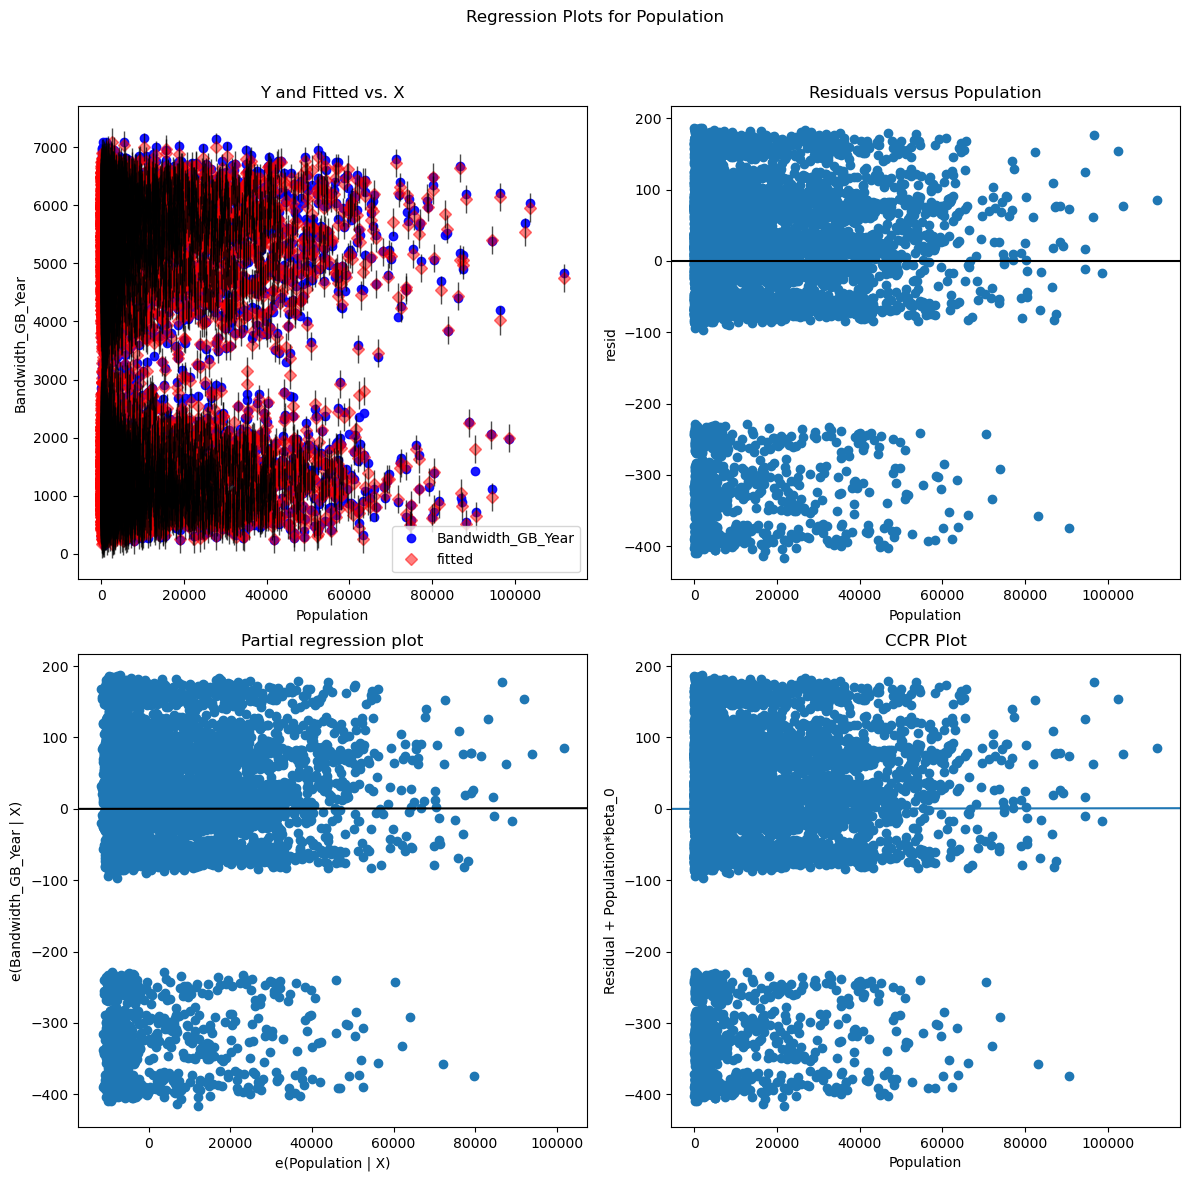

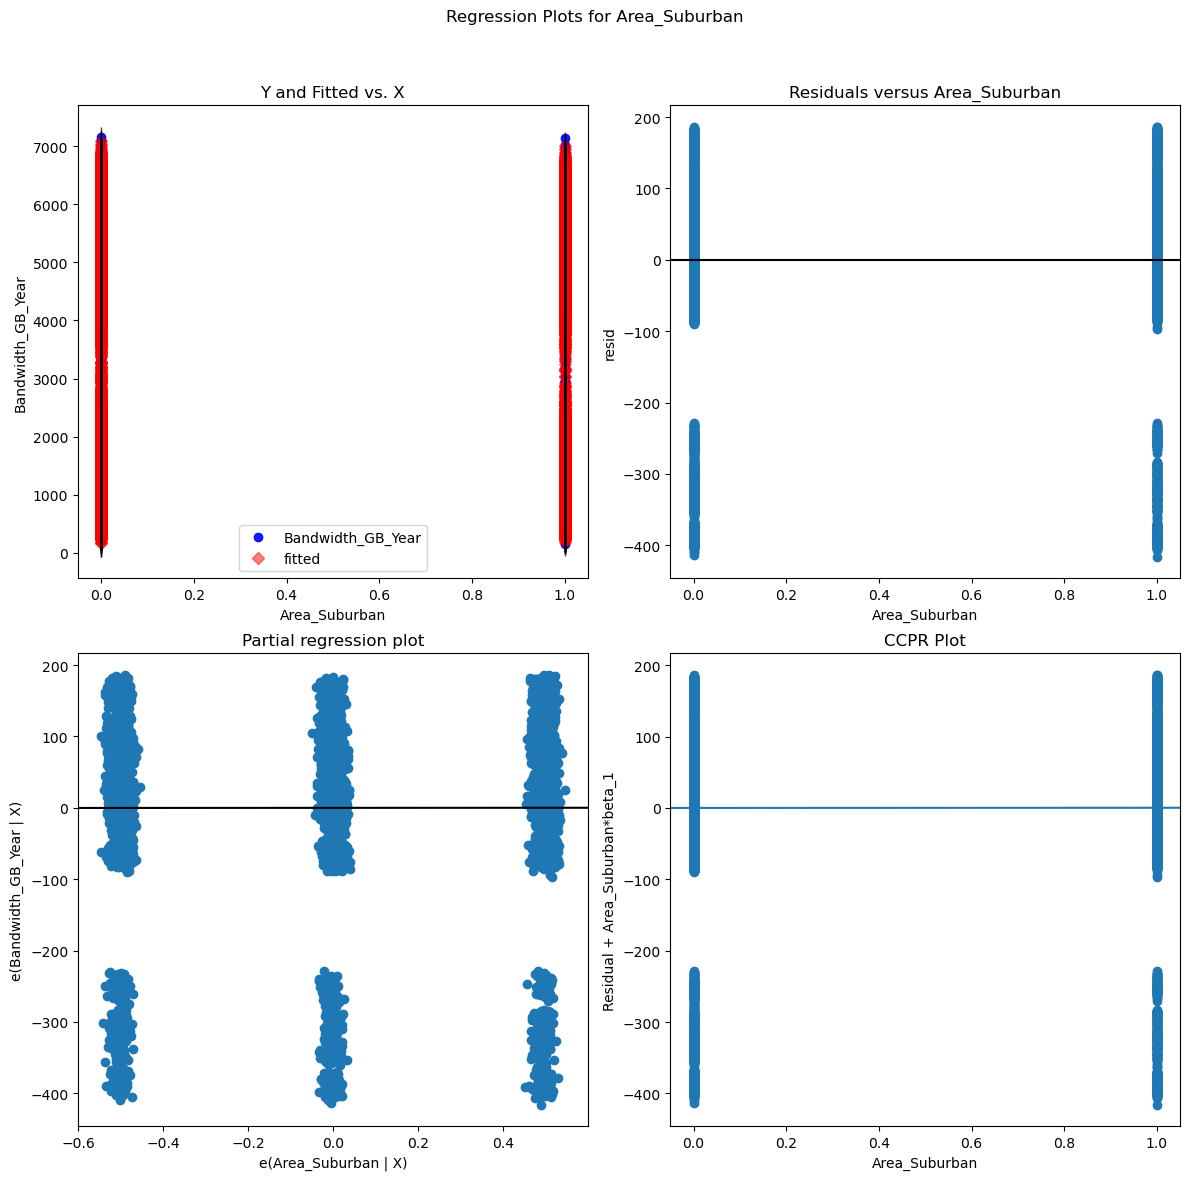

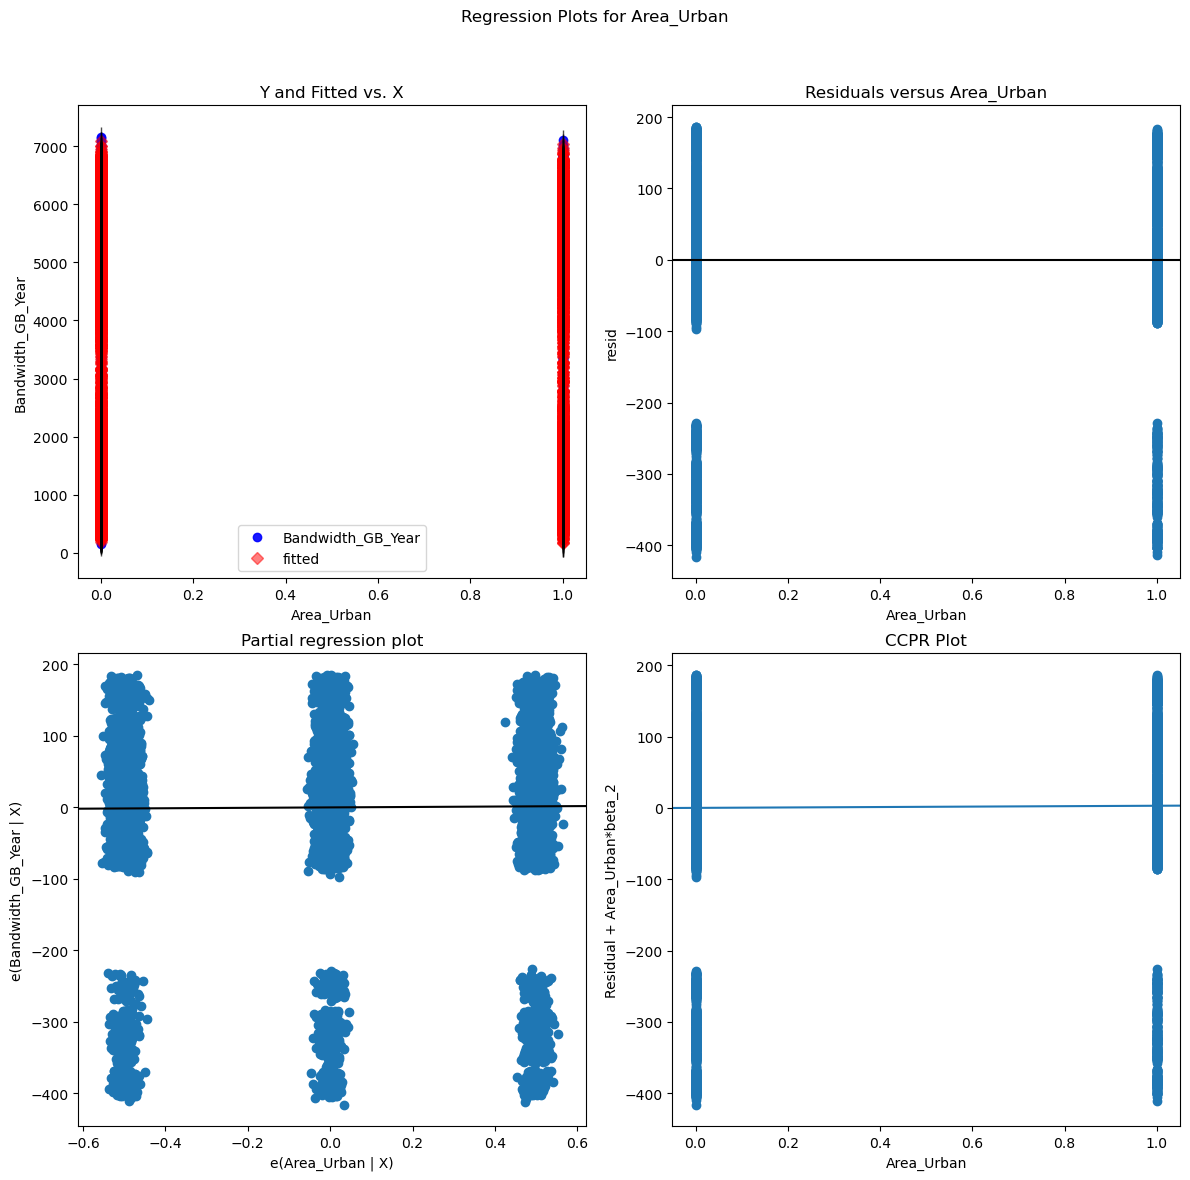

In [ ]:
#Initial Regression
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('churn_clean_final.csv')

independent_variables = ['Population', 'Area_Suburban', 'Area_Urban', 'Children', 'Age', 'Income', 'Marital_Married', 'Marital_Never Married', 
                         'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Contacts', 'Yearly_equip_failure', 'Techie', 
                         'Contract', 'Port_modem', 'Tablet', 'InternetService_Fiber Optic', 'Phone', 'Multiple', 'OnlineSecurity',
                         'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure', 'Email']

#Define dependent variable
y = df['Bandwidth_GB_Year']
#Define independent variables
x = df[independent_variables].assign(const = 1)
#Perform OLS regression
model = sm.OLS(y,x)
#Store regression results
model_result = model.fit()

print(model_result.summary())
print(f'Residual Standard Error: {np.std(model_result.resid)}')

#Remove Email from analysis due to multicoliearity
independent_variables = ['Population', 'Area_Suburban', 'Area_Urban', 'Children', 'Age', 'Income', 'Marital_Married', 'Marital_Never Married', 
                         'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Contacts', 'Yearly_equip_failure', 'Techie', 
                         'Contract', 'Port_modem', 'Tablet', 'InternetService_Fiber Optic', 'Phone', 'Multiple', 'OnlineSecurity',
                         'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'Tenure']

print("I have elected to remove Email due to multicolinearity found in VIF analysis of variables")

#Visualize residual plots
for variable in independent_variables:
    sm.graphics.plot_regress_exog(model_result, variable, fig=plt.figure(figsize=[12,12]))
    plt.show()

#Backwards stepwise elimination

#Establish significance level
significance_level = 0.05

#Loop until model reaches exepected significance for all values
while True:
    #Get current/updated list of independent variables
    x = df[independent_variables].assign(const = 1)
    
    #Perform OLS regression
    model = sm.OLS(y, x)
    #Store regression results
    model_result = model.fit()
    
    #Get the p-values
    p_values = model_result.pvalues.drop('const')
    #Find the highest p-value
    max_p_value = p_values.max()
    #Get the variable with the highest p-value
    highest_variable = p_values.idxmax()
    
    #If the variable with the highest p-value is above significance, remove it, otherwise end elimination
    if max_p_value > significance_level:
        independent_variables.remove(highest_variable)
        print(f"I have decided to remove '{highest_variable}' as it has a p-value {max_p_value}")
        print(model_result.summary())
    else:
        #Reduced model
        print(model_result.summary())
        print(f'Residual Standard Error: {np.std(model_result.resid)}')
        break

